In [74]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [75]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

In [76]:
import pickle as pkl

In [77]:
from sklearn.dummy import DummyClassifier

In [78]:
import xgboost as xgb

In [79]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [80]:
df = pd.read_csv('../data/master_modeling_years-2.csv')
mb_stations = pd.read_csv('../data/estaciones-metrobus0.csv')

In [81]:
df.rename(columns={"nearest_mb": "nombre"}, inplace=True)
df = pd.merge(df, mb_stations)
df['latitud_mb'] = df['Geo Point'].apply(lambda x: float(x.split(',')[0]))
df['longitud_mb'] = df['Geo Point'].apply(lambda x: float(x.split(',')[1]))

In [82]:
df.head(20)

,mes_hechos,fecha_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,fecha_inicio,calle_hechos,longitud,latitud,...,dist_km,manhattan_dist,bearing,geo_hash_crime,geo_hash_mb,Geo Point,Geo Shape,linea,latitud_mb,longitud_mb
0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,FRANCISCO DEL PASO Y TRONCOSO,-99.111563,19.386594,...,0.03,0.040434,-160.877039,9g3w29jp,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
1,Agosto,2017-08-22 15:00:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2017-08-24 15:36:43,PENINSULA,-99.111824,19.387331,...,0.11,0.128945,171.385922,9g3w29kg,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
2,Septiembre,2017-09-12 20:55:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2017-09-12 21:38:08,AVENIDA FRANCISCO DEL PASO Y TRONCOSO,-99.111670,19.386555,...,0.03,0.026577,177.994133,9g3w29jn,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
3,Diciembre,2018-12-29 19:50:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,CAMPAMENTO 2 DE OCTUBRE,IZTACALCO,2018-12-29 21:58:33,PABLO ALVARADO,-99.112752,19.386661,...,0.12,0.151897,108.164933,9g3w29hr,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
4,Noviembre,2018-11-28 17:30:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,CAMPAMENTO 2 DE OCTUBRE,IZTACALCO,2018-11-29 10:56:21,2 DE AGOSTO,-99.113661,19.386001,...,0.21,0.245526,80.287102,9g3w295e,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
5,Julio,2016-07-15 17:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,CAMPAMENTO 2 DE OCTUBRE,IZTACALCO,2016-07-16 11:40:35,CHE GUEVARA,-99.113596,19.386798,...,0.21,0.255611,104.579166,9g3w2978,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
6,Agosto,2017-08-18 00:30:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2017-08-18 01:49:18,EJE 3 OTE. FRANCISCO DEL PASO Y TRONCOSO,-99.111915,19.387749,...,0.16,0.184966,170.490365,9g3w29kv,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
7,Febrero,2018-02-09 14:45:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2018-02-10 21:56:44,ISLA,-99.111478,19.386590,...,0.04,0.048858,-146.915978,9g3w29jp,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
8,Noviembre,2018-11-28 14:00:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2018-11-29 22:05:26,AVENIDA FRANCISCO DEL PASO Y TRONCOSO,-99.111881,19.386518,...,0.03,0.044553,133.113722,9g3w29hy,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662
9,Diciembre,2017-12-17 11:00:00,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,2017-12-19 19:34:59,EJE 3 OTE.,-99.111956,19.388097,...,0.20,0.227958,171.115854,9g3w29kz,9g3w29jj,"19.38632392,-99.1116619153","{""type"": ""Point"", ""coordinates"": [-99.11166191...",5,19.386324,-99.111662


In [83]:
len(df.columns)

29

In [84]:
df.dtypes

mes_hechos           object
fecha_hechos         object
delito               object
categoria_delito     object
colonia_hechos       object
alcaldia_hechos      object
fecha_inicio         object
calle_hechos         object
longitud            float64
latitud             float64
Geopoint             object
nombre               object
geo_mb               object
rob_victim            int64
event_time           object
event_date           object
Linea                 int64
Afluencia             int64
target_crimes         int64
dist_km             float64
manhattan_dist      float64
bearing             float64
geo_hash_crime       object
geo_hash_mb          object
Geo Point            object
Geo Shape            object
linea                 int64
latitud_mb          float64
longitud_mb         float64
dtype: object

## EDA on `fecha_hechos`

In [85]:
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'])
df_robo_objetos = df[df['delito'] == 'ROBO DE OBJETOS']
df_robo_negocio = df[df['delito'] == 'ROBO A NEGOCIO SIN VIOLENCIA']
df_robo_celu_violencia = df[df['delito'] == 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA']
df_robo_celu_con_violencia = df[df['delito'] == 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA']

In [86]:
df_robo_objetos['fecha_hechos'].dt.hour.describe()

count    5652.000000
mean       12.652512
std         5.673714
min         0.000000
25%         9.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: fecha_hechos, dtype: float64

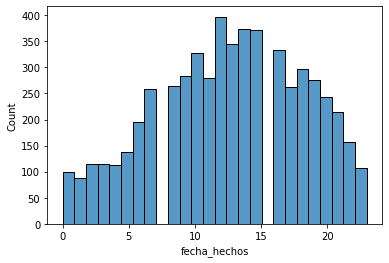

In [87]:
sns.histplot(df_robo_objetos['fecha_hechos'].dt.hour);

In [88]:
df_robo_negocio['fecha_hechos'].dt.hour.describe()

count    5065.000000
mean       14.171372
std         5.426029
min         0.000000
25%        11.000000
50%        15.000000
75%        18.000000
max        23.000000
Name: fecha_hechos, dtype: float64

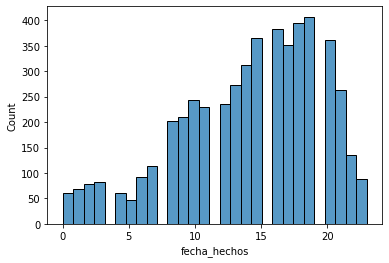

In [89]:
sns.histplot(df_robo_negocio['fecha_hechos'].dt.hour);

In [90]:
df_robo_celu_violencia['fecha_hechos'].dt.hour.describe()

count    4403.000000
mean       13.643652
std         5.039821
min         0.000000
25%         9.000000
50%        14.000000
75%        18.000000
max        23.000000
Name: fecha_hechos, dtype: float64

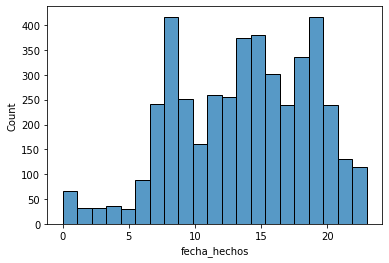

In [91]:
sns.histplot(df_robo_celu_violencia['fecha_hechos'].dt.hour);

In [92]:
df_robo_celu_con_violencia['fecha_hechos'].dt.hour.describe()

count    3292.000000
mean       14.243925
std         6.056583
min         0.000000
25%        10.000000
50%        15.000000
75%        19.000000
max        23.000000
Name: fecha_hechos, dtype: float64

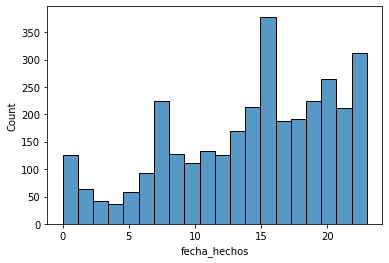

In [93]:
sns.histplot(df_robo_celu_con_violencia['fecha_hechos'].dt.hour);

### Feature `hechos_hour`

In [94]:
df['hechos_hour'] = df['fecha_hechos'].dt.hour
df['hechos_hour'].head(5)

0    20
1    15
2    20
3    19
4    17
Name: hechos_hour, dtype: int64

## Pre-processing

In [95]:
# Setting GLOBAL var: other_dic 
# Keeps track of all the list of non_significant categories
other_dic = {}

In [96]:
# Function taken from the following resource [URL]: 
# https://stackoverflow.com/questions/18016495/get-subset-of-most-frequent-dummy-variables-in-pandas
def dummy_best(dummy_col, threshold=0.01):
        '''
            Function return a dummifed dataframe of significant dummies
            in a given column
        '''
        dummy_columns = dummy_col.copy()
        # What is the ratio of a dummy in whole column
        count = pd.value_counts(dummy_columns) / len(dummy_columns)
        # filtering based on the ratios according to a threshold
        mask = dummy_columns.isin(count[count>threshold].index)
        # replace the ones which ratio is lower than the threshold 
        other_dic[dummy_columns.name] = list(dummy_columns[~mask])
        dummy_columns[~mask] = 'others'
        return pd.get_dummies(dummy_columns, prefix=dummy_columns.name)    

In [97]:
def data_merger(main_df, features):
    merged_df = main_df.copy()
    for element in features:
        merged_df = pd.concat([merged_df, dummy_best(main_df[element])], axis=1)
    return merged_df

In [98]:
# Dealing with class imbalance
df['rob_victim'].value_counts(normalize=True)

0    0.966206
1    0.033794
Name: rob_victim, dtype: float64

In [99]:
df['delito'].value_counts(normalize=True)

ROBO DE OBJETOS                                                0.189486
ROBO A NEGOCIO SIN VIOLENCIA                                   0.169807
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA                     0.147613
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA                     0.110366
ROBO DE ACCESORIOS DE AUTO                                     0.090385
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO                    0.071812
ROBO A CASA HABITACION SIN VIOLENCIA                           0.041974
ROBO DE VEHICULO DE PEDALES                                    0.033257
ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA              0.030844
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA          0.025479
ROBO DE DINERO                                                 0.016159
ROBO DE DOCUMENTOS                                             0.015355
ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA    0.012874
ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA      0

In [100]:
def significance_filter(zip_element):
    significant = []
    not_significant = []
    for i in zip_element:
        if i[1] >=.1:
            significant.append(i[0])
        else:
            not_significant.append(i[0])
    return significant, not_significant

In [101]:
df.shape

(29828, 30)

In [102]:
count = pd.value_counts(df['delito']) / len(df['delito'])
sig, n_sig = significance_filter(list(zip(count.index.values, count)))

In [103]:
df['delito'] = df['delito'].apply(lambda x: None if x in n_sig else x)
df = df.dropna()
df.shape

(18412, 30)

In [104]:
# Label Ecoder for any feature with imporance of order
# based of the percentage of presence of category in column.
def feature_encoder(zip_element, var_dict):
    val_econded = len(zip_element)
    for i in zip_element:
        var_dict[i[0]] = val_econded
        val_econded -= 1

In [105]:
df['delito'].value_counts(normalize=True)

ROBO DE OBJETOS                               0.306974
ROBO A NEGOCIO SIN VIOLENCIA                  0.275092
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA    0.239138
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA    0.178796
Name: delito, dtype: float64

In [106]:
# Fruther cleaning filtering
df['delito'] = df['delito'].apply(lambda x: None if x in ['ROBO A NEGOCIO SIN VIOLENCIA'] else x)
df = df.dropna()
df.shape

(13347, 30)

In [107]:
count = pd.value_counts(df['delito']) / len(df['delito'])
list(zip(count.index.values, count))

[('ROBO DE OBJETOS', 0.42346594740391097),
 ('ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA', 0.32988686596238853),
 ('ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA', 0.24664718663370044)]

In [108]:
encoder_robo_dict = {}
feature_encoder((list(zip(count.index.values, count))), encoder_robo_dict)
encoder_robo_dict

{'ROBO DE OBJETOS': 3,
 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA': 2,
 'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA': 1}

In [109]:
df['delito_enco'] = df['delito'].apply(lambda x: encoder_robo_dict[x]).copy()

In [110]:
df['delito'].value_counts(normalize=True)

ROBO DE OBJETOS                               0.423466
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA    0.329887
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA    0.246647
Name: delito, dtype: float64

In [111]:
df.dtypes

mes_hechos                  object
fecha_hechos        datetime64[ns]
delito                      object
categoria_delito            object
colonia_hechos              object
alcaldia_hechos             object
fecha_inicio                object
calle_hechos                object
longitud                   float64
latitud                    float64
Geopoint                    object
nombre                      object
geo_mb                      object
rob_victim                   int64
event_time                  object
event_date                  object
Linea                        int64
Afluencia                    int64
target_crimes                int64
dist_km                    float64
manhattan_dist             float64
bearing                    float64
geo_hash_crime              object
geo_hash_mb                 object
Geo Point                   object
Geo Shape                   object
linea                        int64
latitud_mb                 float64
longitud_mb         

### RF-Multiclass 

In [112]:
dummy_single = ['nombre', 'Linea']
to_dummy = ['mes_hechos','colonia_hechos', 'alcaldia_hechos', 'geo_hash_crime', 
            'geo_hash_mb']
to_drop = ['rob_victim', 'fecha_inicio', 'Geopoint',
           'event_time', 'event_date', 'calle_hechos', 'geo_mb', 
           'categoria_delito', 'fecha_hechos','target_crimes', 'delito',
           'Geo Shape', 'Geo Point']

rf_df = df.drop(columns=to_drop).copy()
rf_df = pd.get_dummies(rf_df, columns=dummy_single)
rf_df = data_merger(rf_df, to_dummy)
rf_df = rf_df.drop(columns=to_dummy).copy()
rf_df.head(1)

,longitud,latitud,Afluencia,dist_km,manhattan_dist,bearing,linea,latitud_mb,longitud_mb,hechos_hour,...,geo_hash_mb_9g3qx88v,geo_hash_mb_9g3qxbf0,geo_hash_mb_9g3qxcpn,geo_hash_mb_9g3qxf7w,geo_hash_mb_9g3qxfr3,geo_hash_mb_9g3qxspf,geo_hash_mb_9g3w80qp,geo_hash_mb_9g3wbczx,geo_hash_mb_9g3wbkw7,geo_hash_mb_others
0,-99.111563,19.386594,89793,0.03,0.040434,-160.877039,5,19.386324,-99.111662,20,...,0,0,0,0,0,0,0,0,0,1


In [113]:
other_dic.keys()

dict_keys(['mes_hechos', 'colonia_hechos', 'alcaldia_hechos', 'geo_hash_crime', 'geo_hash_mb'])

In [114]:
X = rf_df.drop(columns='delito_enco')
y = rf_df['delito_enco'].to_numpy()

In [115]:
dummy_single = ['nombre', 'Linea']
to_dummy = ['mes_hechos','colonia_hechos', 'alcaldia_hechos', 'geo_hash_crime', 
            'geo_hash_mb']
to_drop = ['rob_victim', 'fecha_inicio',
           'event_time', 'event_date', 'calle_hechos', 'geo_mb', 
           'categoria_delito', 'fecha_hechos','target_crimes', 'delito',
           'Geo Shape', 'Geo Point']

rf_df2 = df.drop(columns=to_drop).copy()
rf_df2 = pd.get_dummies(rf_df2, columns=dummy_single)
rf_df2 = data_merger(rf_df2, to_dummy)
rf_df2 = rf_df2.drop(columns=to_dummy).copy()
rf_df2.shape

(13347, 365)

In [116]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y),y)
class_weights_dic = { i+1:class_weights[i] for i in range(len(class_weights))}
class_weights_dic
    

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass classes=[1 2 3], y=[1 1 1 ... 2 3 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{1: 1.3514580801944107, 2: 1.010447422212128, 3: 0.7871549893842887}

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify =y)

### Further Feature Engineering

In [118]:
coords = np.vstack((X_train[['latitud', 'longitud']].values,
                    X_train[['latitud_mb', 'longitud_mb']].values,
                    X_test[['latitud', 'longitud']].values,
                    X_test[['latitud_mb', 'longitud_mb']].values))
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

X_train.loc[:, 'la_c'] = kmeans.predict(X_train[['latitud', 'longitud']])
X_train.loc[:, 'lon_c'] = kmeans.predict(X_train[['latitud_mb', 'longitud_mb']])
X_test.loc[:, 'la_c'] = kmeans.predict(X_test[['latitud', 'longitud']])
X_test.loc[:, 'lon_c'] = kmeans.predict(X_test[['latitud_mb', 'longitud_mb']])

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [119]:
pca = PCA().fit(coords)
X_train['crime_loc_pca0'] = pca.transform(X_train[['latitud', 'longitud']])[:, 0]
X_train['crime_loc_pca1'] = pca.transform(X_train[['latitud', 'longitud']])[:, 1]
X_train['mb_loc_pca0'] = pca.transform(X_train[['latitud_mb', 'longitud_mb']])[:, 0]
X_train['mb_loc_pca1'] = pca.transform(X_train[['latitud_mb', 'longitud_mb']])[:, 1]
X_test['crime_loc_pca0'] = pca.transform(X_test[['latitud', 'longitud']])[:, 0]
X_test['crime_loc_pca1'] = pca.transform(X_test[['latitud', 'longitud']])[:, 1]
X_test['mb_loc_pca0'] = pca.transform(X_test[['latitud_mb', 'longitud_mb']])[:, 0]
X_test['mb_loc_pca1'] = pca.transform(X_test[['latitud_mb', 'longitud_mb']])[:, 1]

<ipython-input-119-32a26b98acd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['crime_loc_pca0'] = pca.transform(X_train[['latitud', 'longitud']])[:, 0]
<ipython-input-119-32a26b98acd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['crime_loc_pca1'] = pca.transform(X_train[['latitud', 'longitud']])[:, 1]
<ipython-input-119-32a26b98acd3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


### Merge tain and test

In [120]:
pred_df = pd.concat([X_train, X_test], ignore_index=True)

In [121]:
pred_df.to_csv('../data/master_modeling_years-predictions.csv',index=False)

In [122]:
pred_df.shape

(13347, 369)

In [124]:
type(X_train)

pandas.core.frame.DataFrame

### Baseline Classifier

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

### Logistic Regression

In [ ]:
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('lr', LogisticRegression(max_iter=1000, class_weight=class_weights_dic))
    ])

In [ ]:
pipe_params = {
    'lr__C': [0.1, 0.3, 0.5, 1]
}
grid = GridSearchCV(pipe, pipe_params, scoring = 'recall_micro')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.score(X_train, y_train)

In [ ]:
grid.score(X_test, y_test)

## XGBOOST Model

In [ ]:
sm = SMOTE()
Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

In [ ]:
def BalancedSampleWeights(y_train,class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * class_weight_coef
    sample_weights = [class_weight_dict[i] for i in y_train]
    return sample_weights

In [ ]:
weight=BalancedSampleWeights(y,class_weights)
# scale_pos_weight = class_weights_dic
evaluation = [( X_train, y_train), ( X_test, y_test)]
model = xgb.XGBClassifier()
model.fit(Xsm_train, ysm_train,eval_set=evaluation,eval_metric=["merror", "mlogloss"])

In [ ]:
#Generate predictions against our training and test data
pred_train = model.predict(X_train)
proba_train = model.predict_proba(X_train)
pred_test = model.predict(X_test)
proba_test = model.predict_proba(X_test)

In [ ]:
# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(y_test, pred_test))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(y_test, pred_test)/len(y_test))

print ('\nTrain Accuracy:', metrics.accuracy_score(y_train, pred_train))
print ('Test Accuracy:', metrics.accuracy_score(y_test, pred_test))


In [ ]:
xgb.plot_importance(model, importance_type='gain', max_num_features=15);

## XGBOOST Model w/ HyperParameter Tuning

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 130,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),eval_metric=["merror", "mlogloss"])
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="merror",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [ ]:

evaluation = [( X_train, y_train), ( X_test, y_test)]
model_2 = xgb.XGBClassifier(
    colsample_bytree=0.8200759799967978,
    gamma=6.006606209840803,
    max_depth= 11,
    min_child_weight=5,
    reg_alpha=128,
    reg_lambda= 0.09119867325524911,
)
model_2.fit(Xsm_train, ysm_train, eval_set=evaluation, eval_metric=["merror", "mlogloss"])

In [ ]:
pred_train = model.predict(X_train)
proba_train = model.predict_proba(X_train)
pred_test = model.predict(X_test)
proba_test = model.predict_proba(X_test)

In [ ]:
# Print model report
print("Classification report (Test): \n")
print(metrics.classification_report(y_test, pred_test))
print("Confusion matrix (Test): \n")
print(metrics.confusion_matrix(y_test, pred_test)/len(y_test))

print ('\nTrain Accuracy:', metrics.accuracy_score(y_train, pred_train))
print ('Test Accuracy:', metrics.accuracy_score(y_test, pred_test))


In [ ]:
disp = metrics.plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.savefig('../images/confusion_matrix.png',bbox_inches = 'tight');

In [ ]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig('../images/log_logss.png',bbox_inches = 'tight');

In [ ]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig('../images/class_error.png',bbox_inches = 'tight');

In [ ]:
with open('../models/xgboost_pipe.pkl', 'wb') as pickle_out:
    pkl.dump(model, pickle_out)